In [1]:
# Import packages
%matplotlib inline
import os
import urllib
import urllib2

import slug

import numpy as np

import matplotlib.pyplot as plt

import astropy.wcs as wcs
from astropy.io import fits
from astropy.table import Table, Column

from kungpao import io
from kungpao.display import display_single, IMG_CMAP, SEG_CMAP

plt.rc('axes', titlepad=20)

In [3]:
# Login NAOJ server
slug.login_naoj_server('/Users/jiaxuanli/Documents/HSC_config')

In [2]:
obj_cat = Table.read('./Catalogs/z0203.fits', format='fits')

In [10]:
%%time

obj = obj_cat[0]
# Download image
size = 500 # pixel, half_size. The actual size will be 1000*1000.
bands = ['i', 'r', 'g']

irg_data = list()

for band in bands:
    url = slug.gen_url_hsc_s18a(obj['ra'], obj['dec'], 
                       size * slug.HSC_pixel_scale, 
                       size * slug.HSC_pixel_scale, band, only_image=True)[0]
    fits_data = fits.open(url, cache=False)
    irg_data.append(fits_data[1].data)
    fits_data.close()

CPU times: user 323 ms, sys: 142 ms, total: 464 ms
Wall time: 20.4 s


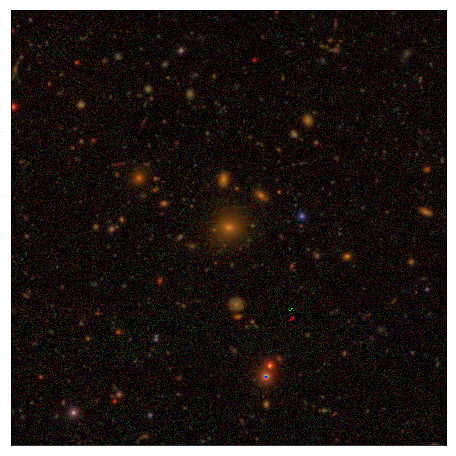

In [11]:
from astropy.visualization import make_lupton_rgb
rgb = make_lupton_rgb(irg_data[0], irg_data[1], irg_data[2], Q=20, stretch=0.5, filename="test_lupton.png")

fig = plt.subplots(figsize=(8,8))
plt.imshow(rgb, origin='lower')
plt.xticks([])
plt.yticks([])
plt.show()